# variables and their meaning
 numcol == colums with numerical values
 missing == all the columns having missing values and no missing values
 missingper == missing value ratio of columns
 miss_col == columns with missing value
 nomiss_col == columns with no missing values
 char_col == colums with object dtype

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder


# Importing dataset

In [3]:
df = pd.read_csv("data/raw/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Selecting the numeric columns

In [5]:
numerics =['int16','int32','int64','float16','float32','float64']
numcol = df.select_dtypes(include=numerics)
len(numcol)
numcol

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [6]:
char_col = df.select_dtypes(include=object)
char_col

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Finding the missing ratio and plotting the graph

In [7]:
missing = df.isna().sum().sort_values(ascending=False)
missing

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [8]:
missingper = df.isna().sum().sort_values(ascending=False)/len(df)
missingper

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

<Axes: >

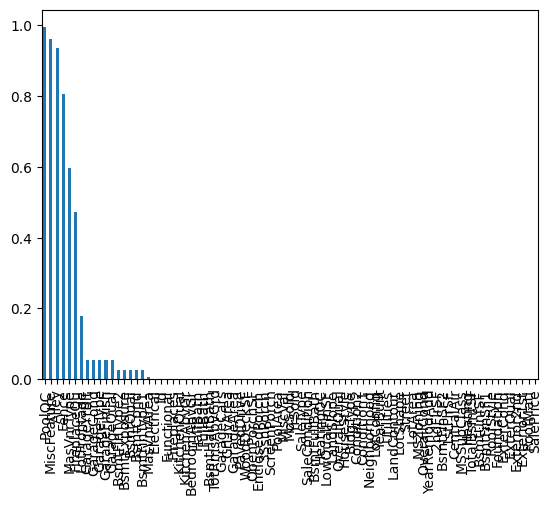

In [9]:
missingper.plot(kind='bar')

# columns with missing value

In [10]:
miss_col = missingper[missingper!=0]
miss_col

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

<Axes: >

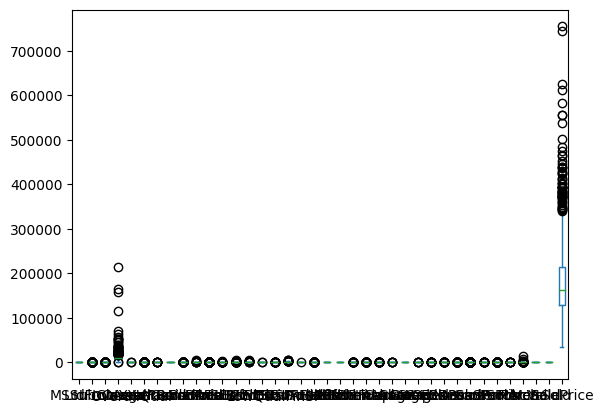

In [11]:
df.plot(kind='box')

# columns with no missing value

In [12]:
nomiss_col = missingper[missingper == 0]
nomiss_col

Id              0.0
Functional      0.0
Fireplaces      0.0
KitchenQual     0.0
KitchenAbvGr    0.0
               ... 
ExterQual       0.0
Exterior2nd     0.0
Exterior1st     0.0
RoofMatl        0.0
SalePrice       0.0
Length: 62, dtype: float64

# Analysis and visualization
## columns that will be analyzed:
    1.MSZoning
    2.YearBuilt
    3.Electrical
    4.Foundation
    5.BldgType
    

In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
df.MSZoning

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

C (all) is not present in the description

In [15]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

Seaborn
scatterplot with linear regression line

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

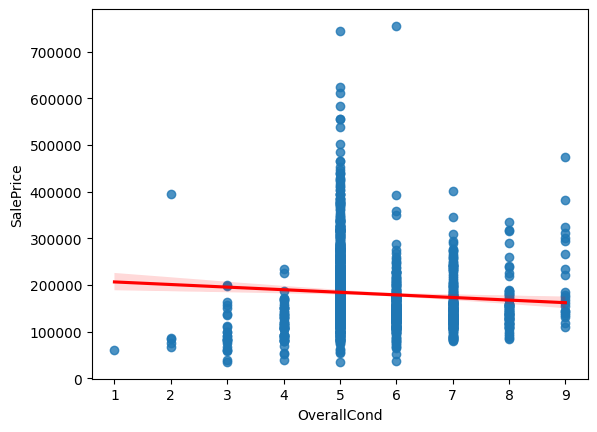

In [16]:

sb.regplot(x = 'OverallCond',y='SalePrice', data=df,line_kws={"color": "red"})

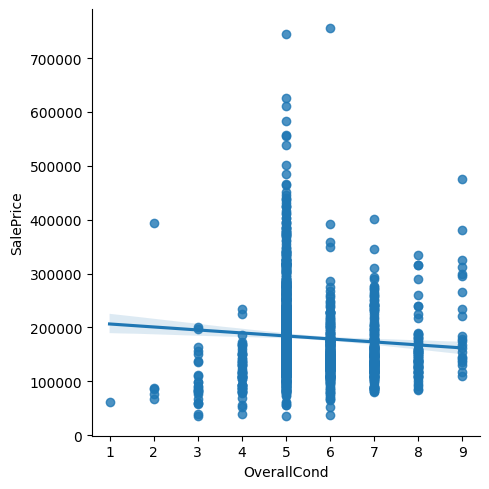

In [17]:
sb.lmplot(x = 'OverallCond',y='SalePrice', data=df)

In [18]:
df.Condition1.value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [19]:
df.SalePrice
df.SalePrice.value_counts()

SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

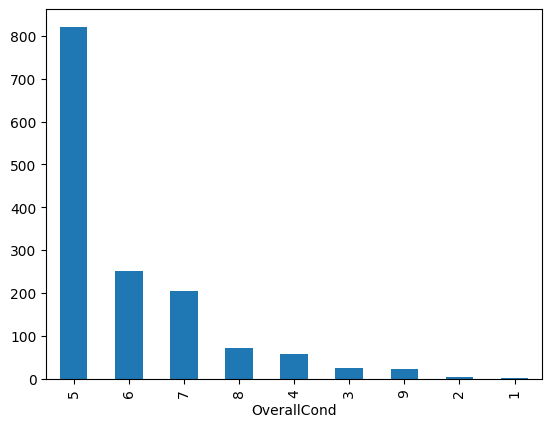

In [20]:

x=df["SalePrice"].value_counts()
y=df["OverallCond"].value_counts()
z=df["OverallQual"].value_counts()
y.plot(kind='bar')
plt.show()


<Axes: xlabel='OverallCond'>

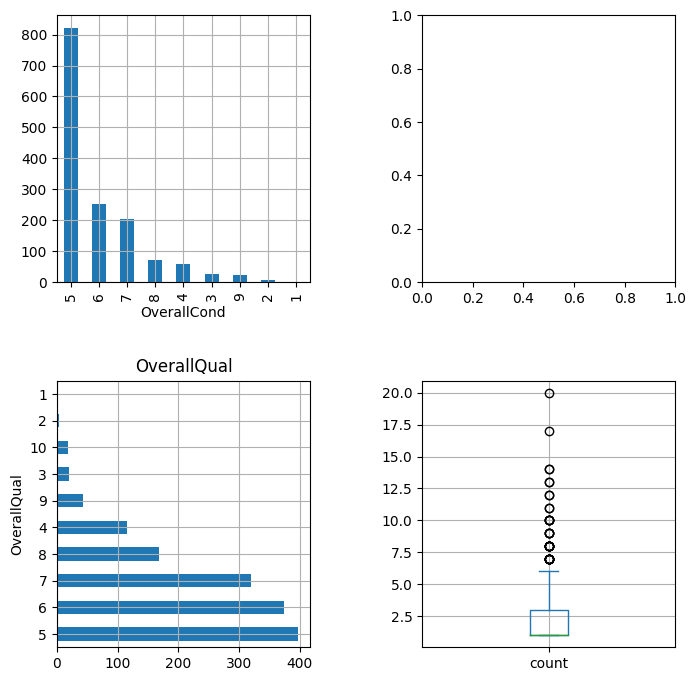

In [21]:

fig, axes = plt.subplots(figsize=(8,8),nrows=2, ncols=2)
fig.tight_layout(pad=5)
ax=plt.subplot(2,2,3)
ax.set_title("SalePrice")
x.plot(ax=axes[1,1], kind='box', grid=True)

z.plot(ax=axes[1,0],kind='barh',grid=True)
ax.set_title("OverallQual")
y.plot(ax =axes[0,0],kind='bar',grid=True)
#ax.set_title("OverallCond")



<Axes: ylabel='Frequency'>

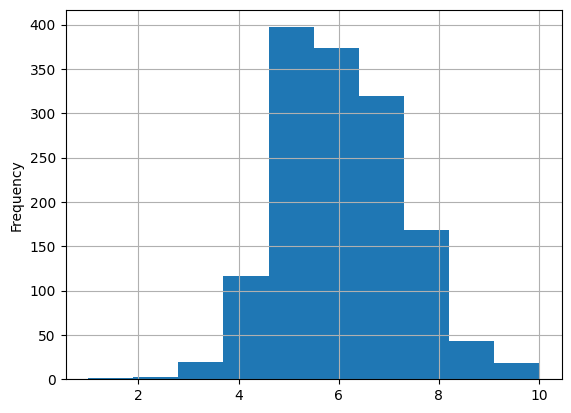

In [22]:
df["OverallQual"].plot(kind='hist',grid=True)

#CONTINUOUS VARIABLE VS TARGET VARIABLE

<Axes: title={'center': 'lotarea vs saleprice regplot'}, xlabel='LotArea', ylabel='SalePrice'>

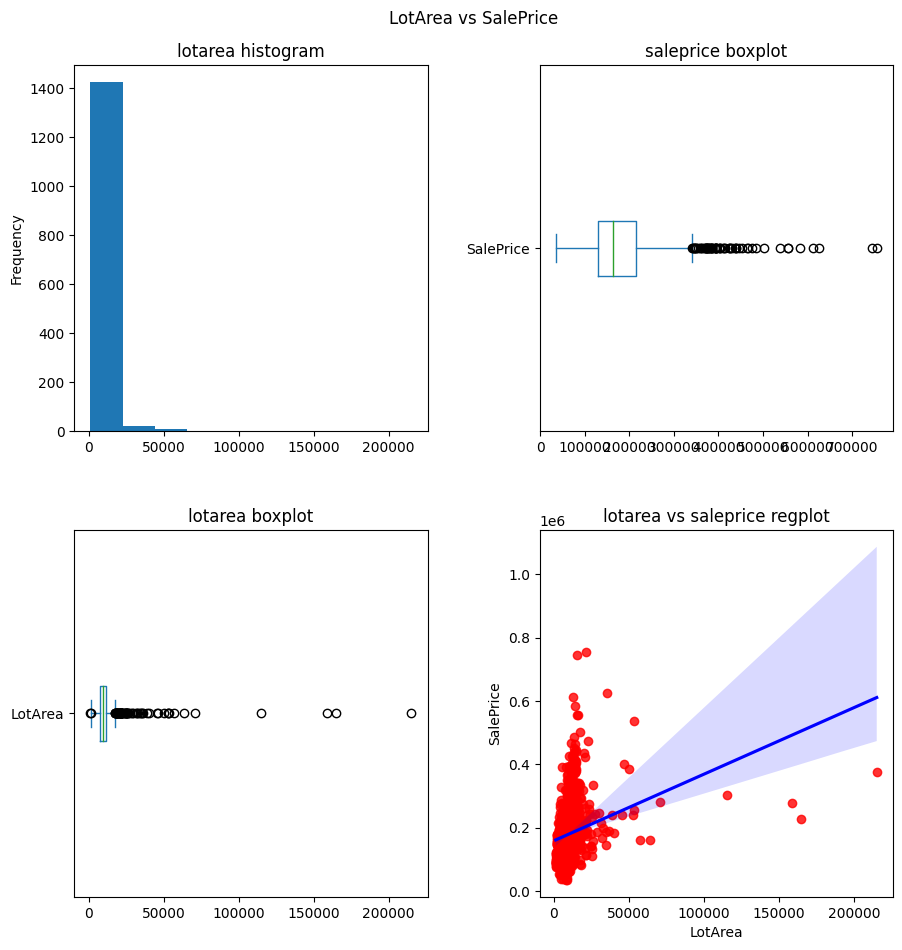

In [4]:
l = df["LotArea"]
s = df['SalePrice']

fig, axes = plt.subplots(2,2,figsize=(10,10))
fig.tight_layout(pad=5,w_pad=5)
fig.suptitle("LotArea vs SalePrice")

axes[0,0].set_title("lotarea histogram")
axes[0,1].set_title("saleprice boxplot")
axes[1,0].set_title("lotarea boxplot")
axes[1,1].set_title("lotarea vs saleprice regplot")

l.plot(ax = axes[0,0],kind='hist')
s.plot(ax = axes[0,1], kind='box',vert=False)
l.plot(ax =axes[1,0],kind='box',vert=False)
sb.regplot(ax = axes[1,1],x=l,y=s,scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<Axes: title={'center': 'overall condition'}, ylabel='OverallCond'>

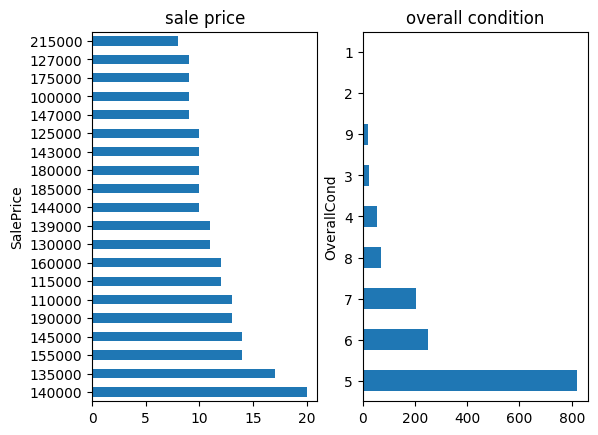

In [ ]:
actual_overallcond = df.OverallCond.value_counts()
actual_saleprice = df.SalePrice.value_counts()

plt.subplot(121)
plt.title("sale price")
actual_saleprice[:20].plot(kind='barh',sharex=actual_overallcond)
plt.subplot(122)
plt.title("overall condition")
actual_overallcond[:20].plot(kind='barh',sharex=actual_saleprice)

Converting categorical variables to dummy variables

In [ ]:
converted_df = pd.get_dummies(data=char_col,dtype=bool)

converted_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1456,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1457,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1458,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


#y=mx+c

In [ ]:
x = [1, 2, 3, 4, 5]
c = 2  # Constant value
y = [m * xi + c for xi in x]
sb.regplot(ax = axes[1,1],x = 'x',y='y', data=df,line_kws={"color": "red"})

NameError: name 'm' is not defined

<Axes: xlabel='count', ylabel='OverallQual'>

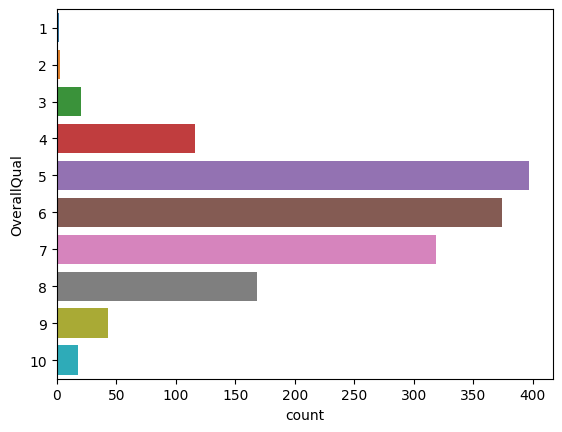

In [11]:
sb.countplot( y = 'OverallQual', data = df)

<Axes: xlabel='SalePrice', ylabel='OverallQual'>

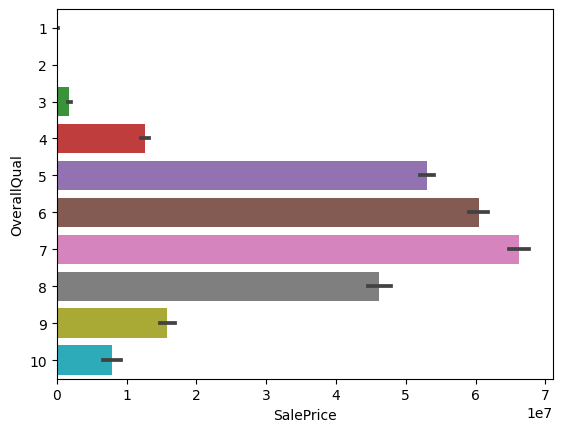

In [10]:
sb.barplot(data = df, x='SalePrice',y='OverallQual', orient= "h", estimator=sum)


<Axes: xlabel='SalePrice', ylabel='OverallQual'>

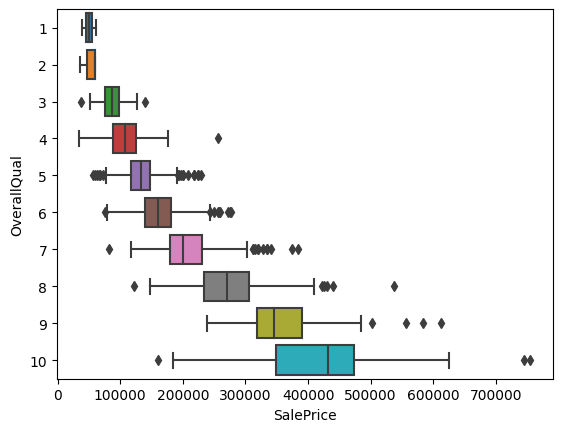

In [8]:
sb.boxplot(data = df, x='SalePrice',y='OverallQual', orient= "h")

# ORDINAL/CATEGORICAL VARIABLE VS TARGET VAIRABLE

<Axes: xlabel='SalePrice', ylabel='OverallQual'>

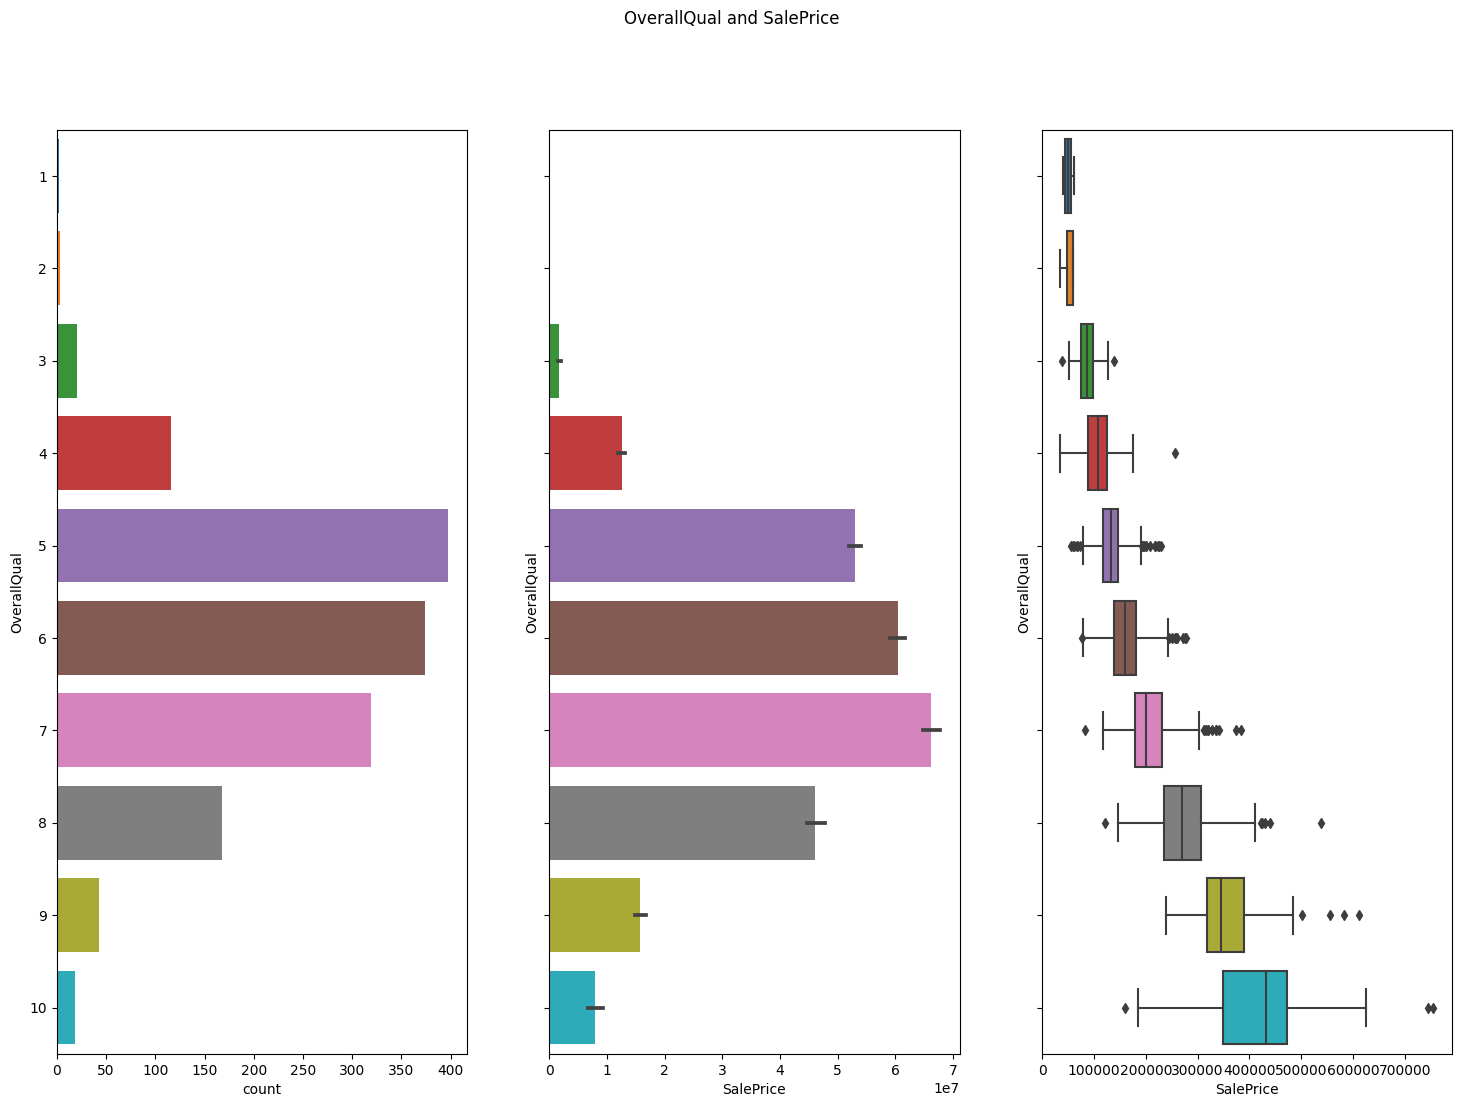

In [11]:
q = df["OverallQual"].value_counts()
s = df["SalePrice"].value_counts()

fig, axes = plt.subplots(1,3,figsize=(18,12), sharey = True)
# fig.tight_layout(pad=3,h_pad=5)
fig.suptitle('OverallQual and SalePrice')


axes[0].set_title("overall quality bargraph")
sb.countplot(ax = axes[0], y = 'OverallQual', data = df)



axes[1].set_title("overall quality bargraph")
sb.barplot(ax = axes[1],data = df, x='SalePrice',y='OverallQual', orient= "h", estimator=sum)

# axes[2].set_title("boxplot sale price")
sb.boxplot(ax = axes[2],data = df, x='SalePrice',y='OverallQual', orient= "h")

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

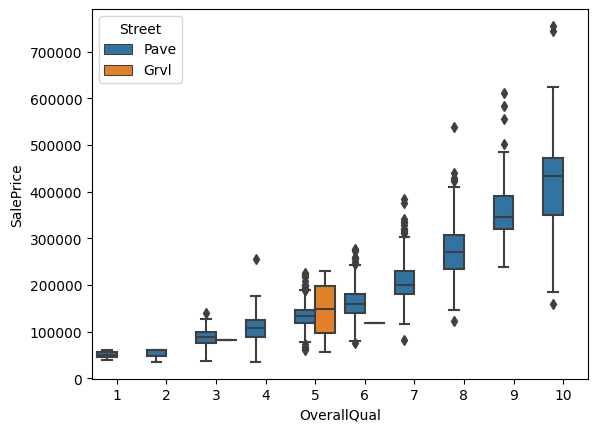

In [15]:
sb.boxplot(data = df, x='OverallQual',y='SalePrice',hue="Street")